# LAB 5: K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Assign column names to the dataset
names = ['class', 'alcohol', 'malicacid', 'ash', 'alcalinity', 'magnesium', 'phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'Color_intensity', 'hue', 'diluted_wines',  'proline']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

## Data Analysis EDA

In [3]:
dataset.shape

(178, 14)

In [4]:
dataset.head()

,class,alcohol,malicacid,ash,alcalinity,magnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,Color_intensity,hue,diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malicacid             178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity            178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   phenols               178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  diluted_wines         178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
dataset.describe()

,class,alcohol,malicacid,ash,alcalinity,magnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,Color_intensity,hue,diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
dataset.groupby('class').size()

class
1    59
2    71
3    48
dtype: int64

## Data Preprocessing

In [16]:
a = [0]  
b = [1,2,3,4]  

X = dataset.iloc[:, b]
y = dataset.iloc[:, a].values.ravel()

## Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 0)

## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [21]:
print(X_train)

[[ 0.87668336  0.79842885  0.64412971  0.12974277]
 [-0.36659076 -0.7581304  -0.39779858  0.33380024]
 [-1.69689407 -0.34424759 -0.32337513 -0.45327855]
 [ 0.51613387  1.38326325  0.42085937  1.00427477]
 [ 0.64046128 -0.50620174  0.90461179  0.12974277]
 [ 0.92641433 -0.78512276  1.23951731  0.85851943]
 [-0.8639004   0.4115384  -0.54664548 -0.45327855]
 [-0.47848543 -0.92908199 -1.73742067 -0.30752322]
 [-1.95798163 -1.46892913  0.49528281  0.42125344]
 [ 0.81451966  0.65446961  0.71855316 -1.26950841]
 [-0.47848543  0.07863266 -0.62106893 -0.30752322]
 [-1.27418086 -1.1540183  -0.24895168  0.42125344]
 [-0.91363137  1.35627089 -0.62106893 -0.30752322]
 [ 1.63508058 -0.40722976  1.31394076  0.12974277]
 [-0.13036867  0.55549764  0.12316557  0.12974277]
 [ 0.62802854  1.09534477 -0.65828065 -0.01601256]
 [ 0.71505773 -0.59617626 -0.21173995 -0.97799775]
 [ 1.68481154 -0.62316862  1.23951731  1.58729609]
 [ 0.90154885 -0.46121447 -0.02568133 -0.86139348]
 [-0.95092959 -0.97406926 -1.58

In [22]:
print(X_test)

[[ 0.93884707 -0.63216607 -0.4350103  -0.91969562]
 [-0.24226334  0.26757916  0.42085937  0.7127641 ]
 [-0.76443848 -1.11802849 -0.76991583 -0.16176789]
 [ 0.71505773 -0.57818135  0.34643592  0.27549811]
 [ 0.08098793  3.08378173 -0.881551    0.56700877]
 [-1.77149051 -0.29026288  3.21173872  2.60758342]
 [ 1.33669479 -0.20028836  0.90461179 -0.56988282]
 [-0.77687122  1.31128363  0.04874212  0.42125344]
 [-0.91363137 -0.57818135 -0.91876272 -0.16176789]
 [-1.12498797 -0.48820683 -0.17452823 -0.30752322]
 [ 0.4664029   0.16860719 -0.06289306  0.12974277]
 [ 1.11290545  2.39997536 -0.50943375  0.12974277]
 [ 1.51075317 -0.551189    0.30922419 -1.26950841]
 [-0.76443848 -1.17201321 -0.99318617 -0.30752322]
 [ 0.73992321  0.18660209  1.20230558  1.44154076]
 [-1.2244499  -1.30697499 -1.36530342 -0.16176789]
 [ 0.96371255 -0.7581304   1.23951731 -0.01601256]
 [ 1.49832042 -0.70414569  0.42085937 -0.89054455]
 [-0.42875446 -0.91108709 -1.29087997 -0.80309135]
 [ 1.05074174 -0.65016097  0.86

## Training the K-NN model on the Training set

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7,p=2,metric='cityblock')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='cityblock', n_neighbors=7)

## Getting nearest neighbours for each point in training data

In [28]:
classifier.kneighbors(X=X_train, n_neighbors=5, return_distance=False)

array([[  0, 141, 120,   9,  24],
       [  1,  69, 132,  34, 125],
       [  2, 123,  92, 131,   6],
       [  3,  45, 118,  26, 108],
       [  4, 104,  98,  86,  41],
       [  5,  41,  22,  98,   4],
       [  6, 116, 123,  10,  46],
       [  7,  19, 138,  97,  28],
       [  8,  11, 131,  38,  73],
       [  9,  94,   0,  75, 101],
       [ 10, 125,  40,   6,  34],
       [ 11,  49,  80, 132,   1],
       [ 12, 116,   6,  46,  84],
       [ 13, 105,  98,   4, 141],
       [ 14,  68, 126,  30,  40],
       [ 15,  88,  21,  81,  20],
       [ 16,  18,  75, 111,  61],
       [ 17,  22,   5,  13,  41],
       [ 18, 111,  75,  16, 129],
       [ 19, 138,   7,  28, 137],
       [ 20,  36,  15,  60,  93],
       [ 21,  15,  88, 108,  26],
       [ 22,  17,   5,  41,  77],
       [ 23, 102, 130, 100,  45],
       [ 24,  93,  20,  15,  60],
       [ 25,  99, 140,  16,  54],
       [ 26, 108, 118, 100,   3],
       [ 27,  56,  34,  74, 125],
       [ 28,  63,  19,  53,  72],
       [ 29,  

In [43]:
 dataset.iloc[[0, 16, 73, 55, 54, 60, 29], a]


,class
0,1
16,1
73,2
55,1
54,1
60,2
29,1


In [44]:
classifier.predict(X_train[[1]])

array([2], dtype=int64)

## Predicting the Test set results

In [49]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [3 3]
 [2 2]
 [1 1]
 [3 2]
 [2 2]
 [1 1]
 [2 3]
 [2 2]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [3 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [3 2]
 [3 1]
 [1 1]
 [1 1]]


## Evaluating the Algorithm
## Making the Confusion Matrix & Predicting Accuracy Score

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

[[12  0  2]
 [ 0 14  2]
 [ 0  1  5]]
Accuracy of our model is equal 86.11 %.


## Making Classification Report

In [51]:
from sklearn.metrics import classification_report
# here f1 score is goodness of fit .
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.93      0.88      0.90        16
           3       0.56      0.83      0.67         6

    accuracy                           0.86        36
   macro avg       0.83      0.86      0.83        36
weighted avg       0.90      0.86      0.87        36



## Comparing Error Rate with the K Value
## Parameter Tuning Using cross-validation for parameter tuning:

In [52]:
from sklearn.model_selection import cross_val_score

# creating list of K for KNN
k_list = list(range(1,50))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


## Plot the error values against K values

<Figure size 640x480 with 0 Axes>

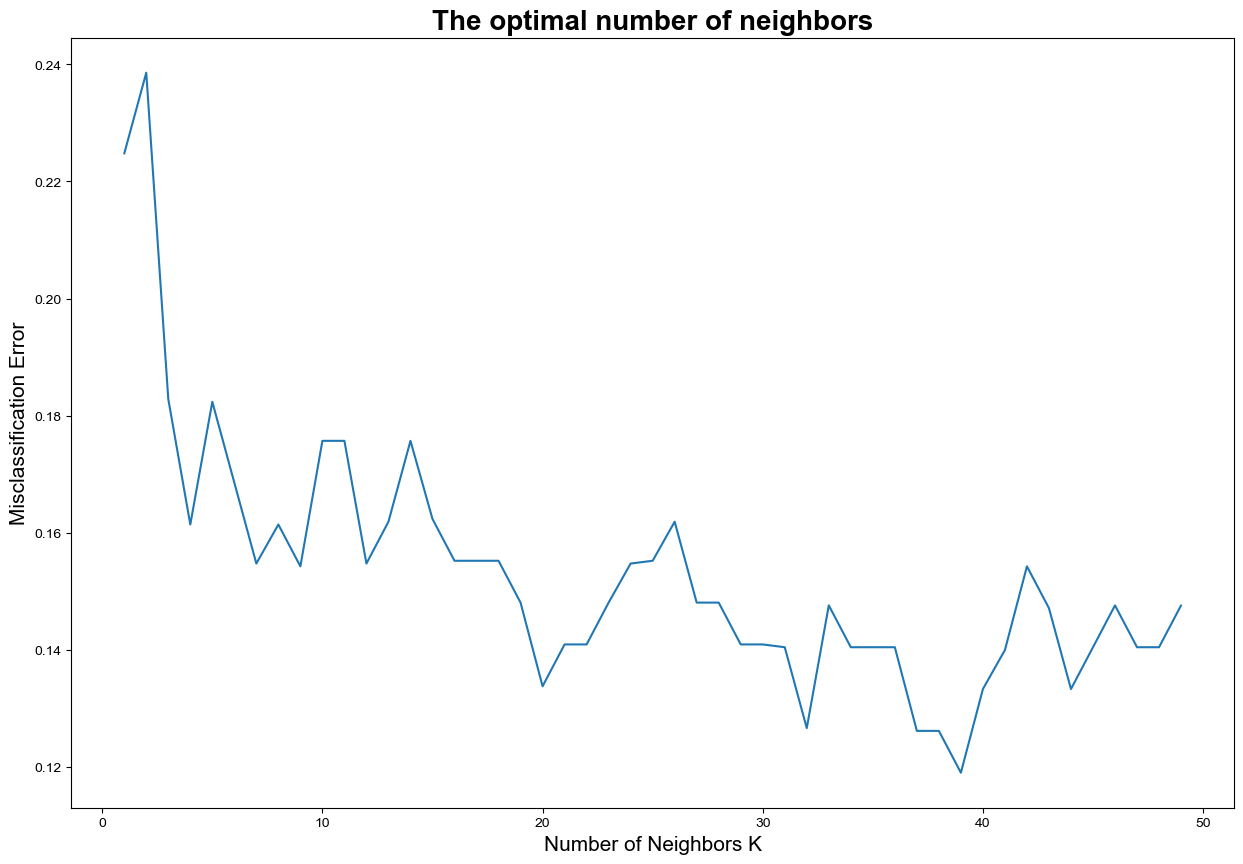

In [53]:
import seaborn as sns

# changing to misclassification error
MSE = [1-x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

## Finding best k

In [54]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 39.


In [55]:
#Class for Testing Example: {alcohol=20.1, malicacid=2.55, ash=1.77, alcalinity=15.66}
classifier.predict([[20.1,2.55,1.77,15.66]])

array([3], dtype=int64)

## Visualize Test Result of KNN

C:\Users\Sanjana\AppData\Local\Temp\ipykernel_22928\3554044303.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], c=cmap(idx), marker=markers[idx], label=cl)


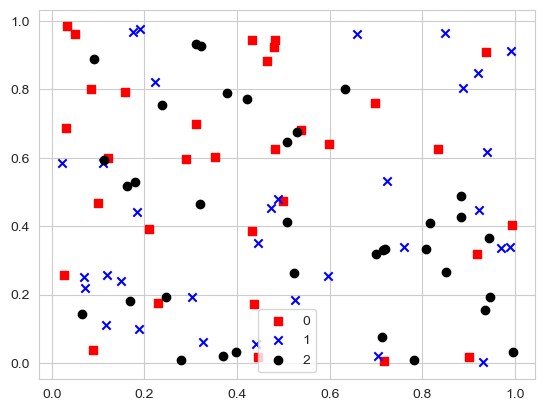

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X = np.random.rand(100, 2)  # Example random data
y = np.random.randint(0, 3, size=100)  # Example random labels
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'black')
cmap = ListedColormap(colors[:len(np.unique(y))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], c=cmap(idx), marker=markers[idx], label=cl)
plt.legend()
plt.grid(True)
plt.show()